# DATA VISUALIZATION

In [1]:
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = p.read_csv('A.csv',encoding="latin-1")
df.head()

,description,fraudulent
0,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",1
1,The group has raised a fund for the purchase o...,1
2,Technician Instrument &amp; ControlsLocation D...,1
3,Sales Executive,1
4,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...",1


In [4]:
df.columns

Index(['description', 'fraudulent'], dtype='object')

In [5]:
df.groupby('fraudulent').describe()

description         \
                 count unique   
fraudulent                      
0                  779    669   
1                  880    631   

                                                                    
                                                          top freq  
fraudulent                                                          
0           Play with kids, get paid for itÃÂ Love travel...   65  
1           We are a full-service marketing and staffing f...   22

Text(0.5, 1.0, 'Distribution of Fraudulent ')

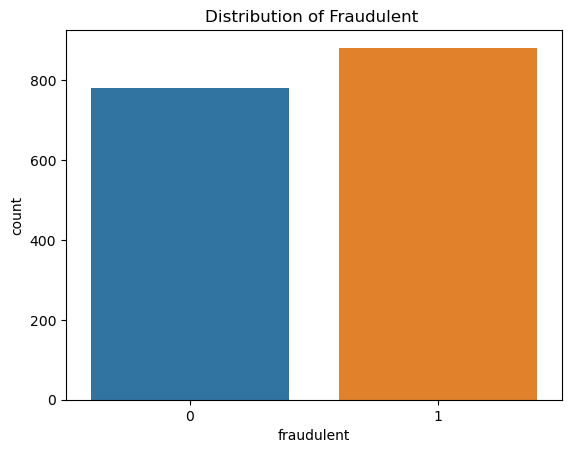

In [6]:
#plotting graph for distribution
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "fraudulent", data = df)
df.loc[:, 'fraudulent'].value_counts()
plt.title('Distribution of Fraudulent ')

In [7]:
df['description'].unique()

array(['IC&amp;E Technician | Bakersfield, CA Mt. PosoPrincipal Duties and Responsibilities:Ã\x82Â\xa0Calibrates, tests, maintains, troubleshoots, and installs all power plant instrumentation, control systems and electrical equipment.Performs maintenance on motor control centers, motor operated valves, generators, excitation equipment and motors.Performs preventive, predictive and corrective maintenance on equipment, coordinating work with various team members.Designs and installs new equipment and/or system modifications.Troubleshoots and performs maintenance on DC backup power equipment, process controls, programmable logic controls (PLC), and emission monitoring equipment.Uses maintenance reporting system to record time and material use, problem identified and corrected, and further action required; provides complete history of maintenance on equipment.Schedule, coordinate, work with and monitor contractors on specific tasks, as required.Follows safe working practices at all times.I

Training model:

In [8]:
#!pip install nltk

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\C NARESH
[nltk_data]     KUMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
for i in range(len(df['description'])):
    df['description'][i] = str(df['description'][i])

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
# remove whitespaces
df['description']=df['description'].str.strip()
# lowercase the text
df['description'] = df['description'].str.lower()
#remove punctuation
punc = string.punctuation
table = str.maketrans('','',punc)
df['description']=df['description'].apply(lambda x: x.translate(table))
# tokenizing each message
df['word_tokens']=df.apply(lambda x: x['description'].split(' '),axis=1)
# removing stopwords
df['cleaned_text'] = df.apply(lambda x: [word for word in x['word_tokens'] if word not in stopwords.words('english')],axis=1)
# stemming
ps = PorterStemmer()
df['stemmed']= df.apply(lambda x: [ps.stem(word) for word in x['cleaned_text']],axis=1)
# remove single letter words
df['final_text'] = df.apply(lambda x: ' '.join([word for word in x['stemmed'] if len(word)>1]),axis=1)


In [12]:
# Now we'll create a vocabulary for the training set with word count
from collections import defaultdict
vocab=defaultdict(int) 
for text in df['final_text'].values:
    for elem in text.split(' '):
        vocab[elem]+=1
    
print(vocab)

defaultdict(<class 'int'>, {'icamp': 29, 'technician': 104, 'bakersfield': 18, 'ca': 16, 'mt': 6, 'posoprincip': 6, 'duti': 388, 'responsibilitiesã\x82â\xa0calibr': 6, 'test': 443, 'maintain': 407, 'troubleshoot': 58, 'instal': 74, 'power': 100, 'plant': 120, 'instrument': 56, 'control': 277, 'system': 647, 'electr': 131, 'equipmentperform': 7, 'mainten': 277, 'motor': 37, 'center': 144, 'oper': 604, 'valv': 14, 'gener': 308, 'excit': 192, 'equip': 369, 'motorsperform': 6, 'prevent': 59, 'predict': 30, 'correct': 90, 'coordin': 204, 'work': 1957, 'variou': 156, 'team': 1424, 'membersdesign': 6, 'new': 712, 'andor': 173, 'modificationstroubleshoot': 6, 'perform': 634, 'dc': 23, 'backup': 36, 'process': 601, 'programm': 16, 'logic': 16, 'plc': 25, 'emiss': 6, 'monitor': 147, 'equipmentus': 7, 'report': 451, 'record': 161, 'time': 671, 'materi': 153, 'use': 412, 'problem': 195, 'identifi': 168, 'action': 82, 'requir': 682, 'provid': 944, 'complet': 231, 'histori': 20, 'equipmentschedul': 

In [13]:
# divide the set in training and test
from sklearn.model_selection import train_test_split
X,X_test,y,y_test = train_test_split(df.loc[:,'description':],df['fraudulent'],test_size=0.2)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 1423 to 1608
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   1328 non-null   object
 1   fraudulent    1328 non-null   int64 
 2   word_tokens   1328 non-null   object
 3   cleaned_text  1328 non-null   object
 4   stemmed       1328 non-null   object
 5   final_text    1328 non-null   object
dtypes: int64(1), object(5)
memory usage: 72.6+ KB


Text(0.5, 1.0, '')

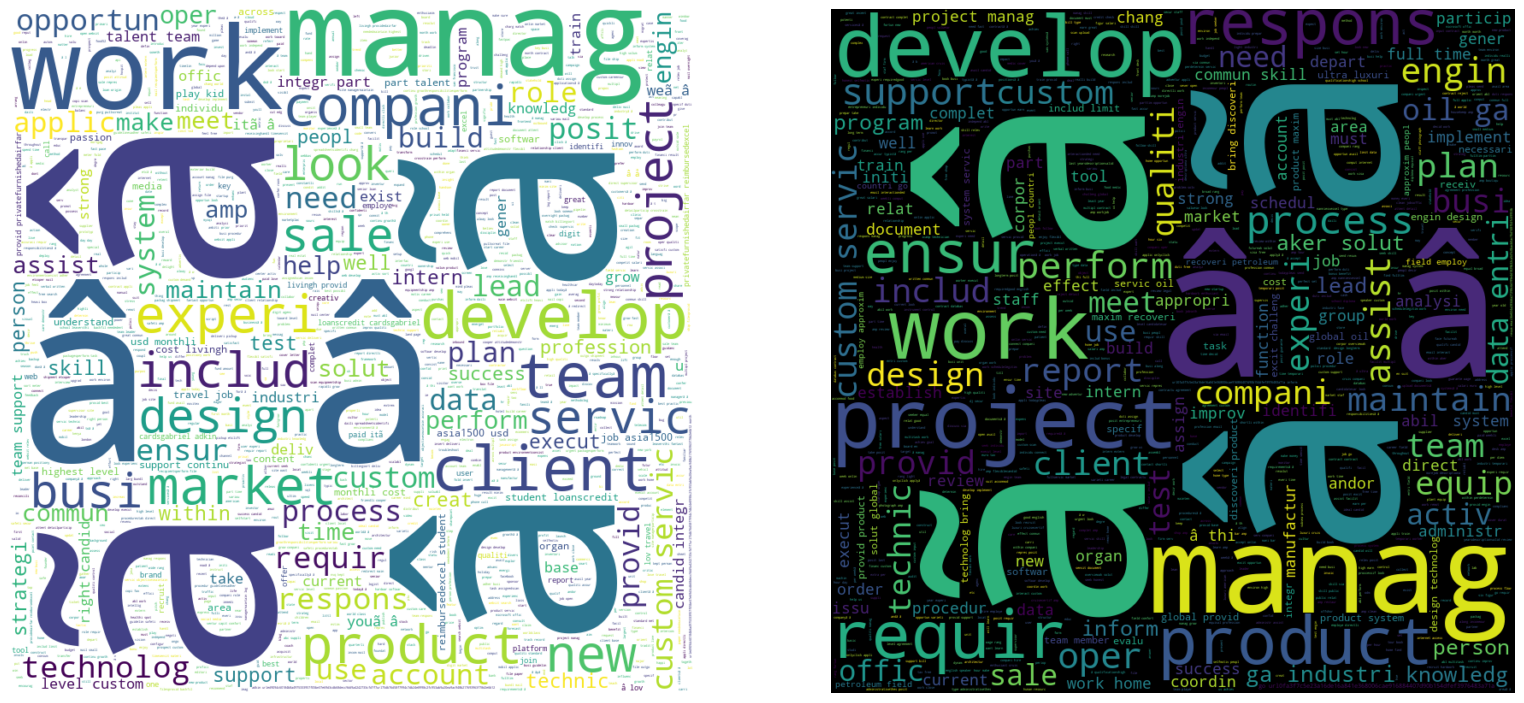

In [15]:
from wordcloud import WordCloud

positive=' '.join(X.loc[y==0,'final_text'].values)
ham_text = WordCloud(background_color='white',max_words=2000,width = 800, height = 800).generate(positive)

negative=' '.join(X.loc[y==1,'final_text'].values)
spam_text = WordCloud(background_color='black',max_words=2000,width = 800, height = 800).generate(negative)




plt.figure(figsize=[30,50])

plt.subplot(1,3,1)
plt.imshow(ham_text,interpolation='bilinear')
plt.title('')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(spam_text, interpolation='bilinear')
plt.axis('off')
plt.title('')

